#  Movie Ticket Buying Behavior Prediction
* Goals: 
    1. Build **predictive models** to tell whether customers are going to buy tickets by their engagement behavior using Python (binary and multiclass)
    2. **Visualizations** of buyer’s engagement behavior and sales in Python or Tableau
* Timeline:
    1. **April 19th**, Midterm check-in. visualization + logistic + linear.
    2. **May 3rd**, Final Deadline

## Import and Combine Datasets

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

In [2]:
# Import and append engagement datasets

# glob.glob('xxx*.csv') - returns List[str]
# pd.read_csv(f) - returns pd.DataFrame()
# for f in glob.glob() - returns a List[DataFrames]
# pd.concat() - returns one pd.DataFrame()
start_time = time.time()
e_data = pd.concat([pd.read_csv(f,
                                sep = '^',
                                compression = 'gzip',
                                header = None) for f in glob.glob('engage_user.csv_*.gz')], 
                   ignore_index = True)
print("--- %s seconds ---" % (time.time() - start_time))

--- 24.83642053604126 seconds ---


In [3]:
# Import and append sales datasets
start_time = time.time()
s_data = pd.concat([pd.read_csv(f,
                                sep = '^',
                                compression = 'gzip',
                                header = None) for f in glob.glob('ticket_sales.csv_*.gz')], 
                   ignore_index = True)
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


--- 7.030402183532715 seconds ---


In [4]:
# Read column names
e_col = pd.read_csv('engage column dict.txt', sep = ' ')
s_col = pd.read_csv('sale column dict.txt', sep = ' ')

In [5]:
e_col.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
column,DATE,HASHED_ATOM_CUSTOMER_ID,OS_TYPE,OS_VERSION,DMA,PRODUCTION_TITLE,PRODUCTION_ID,RELEASE_DATE,CHILDREN_AGE_2_TO_5,CHILDREN_AGE_6_TO_9,...,RATINGS,AVG_STAR_RATING,MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER,MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS,USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES,WANT_TO_SEE_CLICKS,AVG_SECONDS,TRAILER_VIEWS,LOAD_TIME,FILE_NAME
data_type,VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),"NUMBER(38,0)",VARCHAR(16777216),"NUMBER(38,4)","NUMBER(38,4)",...,"NUMBER(38,0)",FLOAT,"NUMBER(38,0)","NUMBER(38,0)","NUMBER(38,4)","NUMBER(38,0)",FLOAT,"NUMBER(38,0)",TIMESTAMP_LTZ(9),VARCHAR(16777216)


In [6]:
s_col.T

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Column,DATE,HASHED_ATOM_CUSTOMER_ID,OS_TYPE,OS_VERSION,PRODUCTION_ID,PRODUCTION_TITLE,RELEASE_DATE,PLF,THREE_D,SOUND,...,ETHNICITY_HISPANIC,RACE_OTHER,RACE_ASIAN,RACE_BLACK,RACE_WHITE,GENDER,DOB,TICKETS,LOAD_TIME,FILE_NAME
data_type,TIMESTAMP_NTZ(9),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),"NUMBER(38,0)",VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),VARCHAR(16777216),...,"NUMBER(38,4)","NUMBER(38,4)","NUMBER(38,4)","NUMBER(38,4)","NUMBER(38,4)",VARCHAR(16777216),"NUMBER(38,0)","NUMBER(38,0)",TIMESTAMP_LTZ(9),VARCHAR(16777216)


In [7]:
# Set the column names for imported file
e_data.columns = e_col['column'].values
s_data.columns = s_col['Column'].values

In [8]:
e_data.head()

,DATE,HASHED_ATOM_CUSTOMER_ID,OS_TYPE,OS_VERSION,DMA,PRODUCTION_TITLE,PRODUCTION_ID,RELEASE_DATE,CHILDREN_AGE_2_TO_5,CHILDREN_AGE_6_TO_9,...,RATINGS,AVG_STAR_RATING,MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER,MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS,USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES,WANT_TO_SEE_CLICKS,AVG_SECONDS,TRAILER_VIEWS,LOAD_TIME,FILE_NAME
0,2018-12-15,56eb54a5ae14ecc72efdfe61a4ca3570,Android,8.0.0,Atlanta,Hellboy,263100,2019-04-12,\\N,\\N,...,0,\\N,2,537059,0.0,0,\\N,0,2018-12-16 10:00:13.805 -0800,for_lionsgate/2018_12_15/daily_engagements_use...
1,2018-12-15,f31a5d596121b9d069dcfc18de2d00e5,iOS,12.1.1,Greenvll-Spart-Ashevll-And,Robin Hood,242124,2018-11-21,\\N,\\N,...,0,\\N,3,537059,0.0,0,\\N,0,2018-12-16 10:00:13.805 -0800,for_lionsgate/2018_12_15/daily_engagements_use...
2,2018-12-15,46cb0a19311ad496ad4e2ab4efa820de,iOS,12.1.1,New York,Robin Hood,242124,2018-11-21,5.8700,7.6100,...,0,\\N,2,537059,0.0,0,\\N,0,2018-12-16 10:00:13.805 -0800,for_lionsgate/2018_12_15/daily_engagements_use...
3,2018-12-15,cb5f01d5426dadb721470754643d20a1,Android,8.0.0,Augusta-Aiken,Robin Hood,242124,2018-11-21,28.2500,23.9300,...,0,\\N,2,537059,0.0,0,\\N,0,2018-12-16 10:00:13.805 -0800,for_lionsgate/2018_12_15/daily_engagements_use...
4,2018-12-15,9a6b858441ccdf0d523e1ee8b629169e,iOS,12.1,Boise,Robin Hood,242124,2018-11-21,0.0000,0.0000,...,0,\\N,1,537059,0.0,0,\\N,0,2018-12-16 10:00:13.805 -0800,for_lionsgate/2018_12_15/daily_engagements_use...


In [9]:
e_data.shape

(2130079, 29)

In [10]:
s_data.head()

,DATE,HASHED_ATOM_CUSTOMER_ID,OS_TYPE,OS_VERSION,PRODUCTION_ID,PRODUCTION_TITLE,RELEASE_DATE,PLF,THREE_D,SOUND,...,ETHNICITY_HISPANIC,RACE_OTHER,RACE_ASIAN,RACE_BLACK,RACE_WHITE,GENDER,DOB,TICKETS,LOAD_TIME,FILE_NAME
0,2017-08-17 00:00:00.000,f657016f21c7777164148ef88ae3788e,iOS,10.3.2,231720,The Hitman's Bodyguard,2017-08-18,\\N,\\N,DVS,...,23.3100,17.4500,8.9400,16.7300,69.3500,F,1990,1,2018-08-10 11:52:18.058 -0700,for_lionsgate/2017_08_17/daily_tickets_user_20...
1,2017-08-17 00:00:00.000,fc74d1ca8cd35508b1ded6ed4aa2e8aa,iOS,10.3.1,231720,The Hitman's Bodyguard,2017-08-18,\\N,\\N,\\N,...,47.0400,58.3200,12.6900,14.1000,22.9400,\\N,1975,1,2018-08-10 11:52:18.058 -0700,for_lionsgate/2017_08_17/daily_tickets_user_20...
2,2017-08-17 00:00:00.000,c434cfbae49efe25513eb607d73e7412,iOS,11.0,231720,The Hitman's Bodyguard,2017-08-18,\\N,\\N,\\N,...,20.8400,20.3600,18.2900,12.8100,69.0500,M,1993,3,2018-08-10 11:52:18.058 -0700,for_lionsgate/2017_08_17/daily_tickets_user_20...
3,2017-08-17 00:00:00.000,b58a1fb32978617be501d71ff0ad1e4f,Android,7.0,231720,The Hitman's Bodyguard,2017-08-18,DOLBYCINEMA,\\N,ATMOS,...,25.1600,14.4300,8.6700,20.1100,60.6800,\\N,\\N,3,2018-08-10 11:52:18.058 -0700,for_lionsgate/2017_08_17/daily_tickets_user_20...
4,2017-08-17 00:00:00.000,ea4180d796b07718760a552a2b661c6e,Android,7.0,231720,The Hitman's Bodyguard,2017-08-18,\\N,\\N,\\N,...,38.3400,6.1900,0.0000,12.4300,94.1700,M,1959,7,2018-08-10 11:52:18.058 -0700,for_lionsgate/2017_08_17/daily_tickets_user_20...


In [11]:
s_data.shape

(557759, 29)

In [12]:
s_data['TICKETS'].unique()

array([  1,   3,   7,   2,   4,   6,   5,  11,   8,  10,  15,   9,  12,
        17,  27,  20,  14,  16,  21,  13,  22,  18,  25,  51,  31,  19,
        60,  28,  30,  24,  68,  50,  23,  34,  36,  38,  74,  32,  65,
       100,  80,  71, 130,  66,  90,  70, 120, 112,  35,  48,  44,  26,
        40,  33,  39, 166,  29,  37,  42,  53,  49,  88, 140, 138,  54,
        45,  41,  43,  63,  46, 260, 170, 150, 110], dtype=int64)

## Data Cleaning - 1

In [13]:
# Convert all NAs into actual Nulls
e_data = e_data.replace(r'\\N', np.nan, regex = True)
s_data = s_data.replace(r'\\N', np.nan, regex = True)

## Understanding the Data
Check:
1. Unique values and NAs in each column
2. Numeric Variables: the distribution, max & min, median, mean, mode, timeline trend
3. Categorical Variables: distribution


In [14]:
#unique values and NAs in engagement dataset
e_na_unique = pd.concat([e_data.nunique(), 
                       len(e_data) - e_data.count(), 
                       (len(e_data) - e_data.count()) / len(e_data)], axis = 1)
e_na_unique.columns = ['unique', 'na', 'na%']
e_na_unique

,unique,na,na%
DATE,648,0,0.000000
HASHED_ATOM_CUSTOMER_ID,1469904,0,0.000000
OS_TYPE,3,0,0.000000
OS_VERSION,90,912024,0.428164
DMA,226,901771,0.423351
PRODUCTION_TITLE,193,0,0.000000
PRODUCTION_ID,189,0,0.000000
RELEASE_DATE,147,52,0.000024
CHILDREN_AGE_2_TO_5,110,1383956,0.649721
CHILDREN_AGE_6_TO_9,108,1383956,0.649721


In [15]:
#unique values and NAs in sales dataset
s_na_unique = pd.concat([s_data.nunique(), 
                       len(s_data) - s_data.count(), 
                       (len(s_data) - s_data.count()) / len(s_data)], axis = 1)
s_na_unique.columns = ['unique', 'na', 'na%']
s_na_unique

,unique,na,na%
DATE,645,0,0.000000
HASHED_ATOM_CUSTOMER_ID,398267,0,0.000000
OS_TYPE,3,0,0.000000
OS_VERSION,191,72770,0.130469
PRODUCTION_ID,67,0,0.000000
PRODUCTION_TITLE,67,0,0.000000
RELEASE_DATE,54,2,0.000004
PLF,15,524696,0.940722
THREE_D,2,557446,0.999439
SOUND,3,408538,0.732463


In [16]:
# Basic summary statistics for numeric columns
## Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
e_data.describe()

,PRODUCTION_ID,RATINGS,MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER,MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS,USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES,WANT_TO_SEE_CLICKS,TRAILER_VIEWS
count,2130079.00,2130079.00,2130079.00,2130079.00,2130079.00,2130079.00,2130079.00
mean,238288.11,0.04,3.09,272903.29,0.00,0.02,0.08
std,18780.41,0.27,6.72,204954.06,0.00,0.14,0.31
min,3266.00,0.00,0.00,43357.00,0.00,0.00,0.00
25%,233641.00,0.00,1.00,143704.00,0.00,0.00,0.00
50%,235280.00,0.00,1.00,208989.00,0.00,0.00,0.00
75%,250293.00,0.00,3.00,320604.00,0.00,0.00,0.00
max,284335.00,31.00,1086.00,1240232.00,0.01,52.00,30.00


In [17]:
s_data.describe()

,PRODUCTION_ID,TICKETS
count,557759.00,557759.00
mean,239137.90,1.67
std,18428.02,1.73
min,4462.00,1.00
25%,231720.00,1.00
50%,235280.00,1.00
75%,250293.00,2.00
max,284335.00,260.00


In [18]:
# data range of two datasets
print(e_data['DATE'].max(), e_data['DATE'].min())
print(s_data['DATE'].max(), s_data['DATE'].min())

2019-01-08 2017-04-01
2019-01-08 00:00:00.000 2017-04-01 00:00:00.000


In [19]:
# Common columns in both datasets
common_col = list(set(e_col['column']).intersection(s_col['Column']))
print(common_col, len(common_col)) #19 columns out of 29 columns are the same across two datasets

# Which one should we use to join the two datasets?

['RACE_ASIAN', 'PRODUCTION_TITLE', 'LOAD_TIME', 'GENDER', 'PRODUCTION_ID', 'CHILDREN_AGE_6_TO_9', 'FILE_NAME', 'HASHED_ATOM_CUSTOMER_ID', 'CHILDREN_AGE_2_TO_5', 'RACE_OTHER', 'RELEASE_DATE', 'CHILDREN_AGE_12_TO_17', 'DATE', 'OS_TYPE', 'RACE_WHITE', 'ETHNICITY_HISPANIC', 'RACE_BLACK', 'CHILDREN_AGE_10_TO_11', 'OS_VERSION'] 19


In [20]:
# Use 'HASHED_ATOM_CUSTOMER_ID' and 'PRODUCTION_ID' to join the two dataset

## left join sales dataset and engagement dataset, 
## and append suffix in the end of column names to distinguish columns from two datasets
data = pd.merge(e_data, s_data, 
                how = 'left', 
                on = ['HASHED_ATOM_CUSTOMER_ID','PRODUCTION_ID'],
                suffixes=('_e', '_s'))

## Note that there are customer IDs in sales dataset that are not in the engagement dataset. 
## I think we should IGNORE these IDs for now since we are trying to understand the relationship between 
## "Engagement Behavior" and "Ticket Sales". If there are no engagement data for this customer,  then we don't 
## really need to look into them.

In [21]:
e_data.groupby('PRODUCTION_ID')['PRODUCTION_TITLE'].nunique().sort_values(ascending=False)

PRODUCTION_ID
253215    2
242124    2
282425    2
256574    2
219038    1
216252    1
215900    1
214934    1
214706    1
214195    1
210815    1
210814    1
210379    1
284335    1
209869    1
220523    1
205126    1
200671    1
199263    1
199262    1
198021    1
196433    1
194456    1
194455    1
206971    1
222787    1
220981    1
222953    1
233641    1
233626    1
         ..
237464    1
236282    1
235579    1
235519    1
235280    1
235253    1
243951    1
245220    1
252839    1
245787    1
252759    1
251808    1
251780    1
250873    1
250390    1
250293    1
249873    1
249844    1
249342    1
249339    1
249202    1
249200    1
248102    1
248017    1
247903    1
247308    1
246965    1
246786    1
246324    1
3266      1
Name: PRODUCTION_TITLE, Length: 189, dtype: int64

In [22]:
data.shape

(2226075, 56)

In [23]:
data.columns

Index(['DATE_e', 'HASHED_ATOM_CUSTOMER_ID', 'OS_TYPE_e', 'OS_VERSION_e', 'DMA',
       'PRODUCTION_TITLE_e', 'PRODUCTION_ID', 'RELEASE_DATE_e',
       'CHILDREN_AGE_2_TO_5_e', 'CHILDREN_AGE_6_TO_9_e',
       'CHILDREN_AGE_10_TO_11_e', 'CHILDREN_AGE_12_TO_17_e',
       'ETHNICITY_HISPANIC_e', 'RACE_OTHER_e', 'RACE_ASIAN_e', 'RACE_BLACK_e',
       'RACE_WHITE_e', 'GENDER_e', 'YOB', 'RATINGS', 'AVG_STAR_RATING',
       'MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER',
       'MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS',
       'USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES', 'WANT_TO_SEE_CLICKS',
       'AVG_SECONDS', 'TRAILER_VIEWS', 'LOAD_TIME_e', 'FILE_NAME_e', 'DATE_s',
       'OS_TYPE_s', 'OS_VERSION_s', 'PRODUCTION_TITLE_s', 'RELEASE_DATE_s',
       'PLF', 'THREE_D', 'SOUND', 'SHOWTIME_LOCAL', 'SHOWTIME_UTC',
       'VENUE_NAME', 'VENUE_ZIP', 'TICKET_TYPE', 'CHILDREN_AGE_2_TO_5_s',
       'CHILDREN_AGE_6_TO_9_s', 'CHILDREN_AGE_10_TO_11_s',
       'CHILDREN_AGE_12_TO_17_s', 'ETHNICITY_HISPANIC_s', '

In [24]:
data.head().T

,0,1,2,3,4
DATE_e,2018-12-15,2018-12-15,2018-12-15,2018-12-15,2018-12-15
HASHED_ATOM_CUSTOMER_ID,56eb54a5ae14ecc72efdfe61a4ca3570,f31a5d596121b9d069dcfc18de2d00e5,46cb0a19311ad496ad4e2ab4efa820de,cb5f01d5426dadb721470754643d20a1,9a6b858441ccdf0d523e1ee8b629169e
OS_TYPE_e,Android,iOS,iOS,Android,iOS
OS_VERSION_e,8.0.0,12.1.1,12.1.1,8.0.0,12.1
DMA,Atlanta,Greenvll-Spart-Ashevll-And,New York,Augusta-Aiken,Boise
PRODUCTION_TITLE_e,Hellboy,Robin Hood,Robin Hood,Robin Hood,Robin Hood
PRODUCTION_ID,263100,242124,242124,242124,242124
RELEASE_DATE_e,2019-04-12,2018-11-21,2018-11-21,2018-11-21,2018-11-21
CHILDREN_AGE_2_TO_5_e,NaN,NaN,5.8700,28.2500,0.0000
CHILDREN_AGE_6_TO_9_e,NaN,NaN,7.6100,23.9300,0.0000


In [25]:
len(data[data['PRODUCTION_TITLE_s'].isna()])/len(data)

0.8065433554574756

In [26]:
data['TICKETS'].unique()

array([ nan,   2.,   1.,   3.,   6.,   4.,  12.,  10.,   5.,  14.,   7.,
         8.,  11.,  30.,  16.,  15.,   9.,  13.,  38.,  20.,  28.,  18.,
        26.,  32.,  25.,  21.,  48.,  24.,  23.,  17.,  19.,  22.,  36.,
        34.,  74.,  40.,  27.,  37.,  42.,  29., 100.,  80., 130.,  90.,
        60.,  70., 120.,  71.,  66.,  68.,  50.,  46.,  53.,  88., 140.,
       138.,  54.,  65.,  44.,  51.])

In [27]:
data['TICKETS'].isna().sum()/len(data)

0.8065433554574756

In [28]:
len(data[data['TICKETS']==1])/len(data)

0.11270779286412183

In [29]:
len(data[data['TICKETS']==2])/len(data)

0.057872713183518075

In [30]:
data['TICKETS'] = data['TICKETS'].replace(np.nan, 0)

In [31]:
data['TICKETS'].unique()

array([  0.,   2.,   1.,   3.,   6.,   4.,  12.,  10.,   5.,  14.,   7.,
         8.,  11.,  30.,  16.,  15.,   9.,  13.,  38.,  20.,  28.,  18.,
        26.,  32.,  25.,  21.,  48.,  24.,  23.,  17.,  19.,  22.,  36.,
        34.,  74.,  40.,  27.,  37.,  42.,  29., 100.,  80., 130.,  90.,
        60.,  70., 120.,  71.,  66.,  68.,  50.,  46.,  53.,  88., 140.,
       138.,  54.,  65.,  44.,  51.])

<BarContainer object of 3 artists>

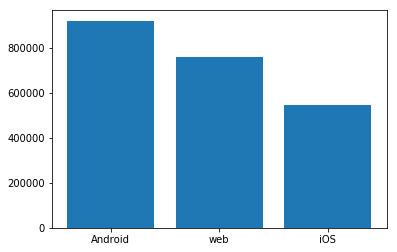

In [32]:
# os type
os_type = ['Android', 'web', 'iOS']
values = data['OS_TYPE_e'].value_counts()
plt.bar(os_type, values)

In [33]:
#DMA Heat Map
data['DMA'].value_counts()

New York                      170159
Los Angeles                   135957
Chicago                        56364
Atlanta                        45986
Miami-Ft. Lauderdale           44775
Philadelphia                   44472
Washington, DC (Hagrstwn)      42154
Dallas-Ft. Worth               39888
Houston                        37907
Orlando-Daytona Bch-Melbrn     31457
Seattle-Tacoma                 30542
San Francisco-Oak-San Jose     29344
Tampa-St. Pete (Sarasota)      27801
Boston (Manchester)            27106
San Diego                      25467
Phoenix (Prescott)             22045
Nashville                      19200
Salt Lake City                 18966
Detroit                        18469
Sacramnto-Stkton-Modesto       17348
Denver                         16742
San Antonio                    14695
Charlotte                      13604
Baltimore                      13269
Palm Springs                   12958
Las Vegas                      12756
Portland, OR                   11131
M

In [34]:
#production ID
data['PRODUCTION_TITLE_e'].value_counts()

Jigsaw                                      328064
The Hitman's Bodyguard                      284369
Wonder                                      213549
The Big Sick                                165376
My Little Pony                              155861
Uncle Drew                                  110845
All Eyez on Me                              108507
Robin Hood                                  100218
Tyler Perry's Boo 2! A Madea Halloween       96075
The Spy Who Dumped Me                        88119
A Simple Favor                               55983
Kin                                          52644
The Glass Castle                             43758
Acrimony                                     37005
Power Rangers                                34256
Hell Fest                                    33840
Overboard                                    32847
How to Be a Latin Lover                      31883
Hunter Killer                                27032
Winchester                     

In [35]:
data['TICKETS'].value_counts()

0.00      1795426
1.00       250896
2.00       128829
3.00        23068
4.00        15080
5.00         4135
6.00         3535
8.00         1374
7.00         1040
10.00         576
9.00          514
12.00         363
11.00         247
16.00         147
14.00         103
18.00          96
13.00          86
20.00          82
15.00          71
100.00         57
22.00          51
24.00          34
17.00          33
28.00          19
30.00          18
19.00          17
23.00          17
26.00          17
25.00          15
21.00          14
80.00          12
36.00           8
32.00           8
60.00           7
27.00           7
38.00           6
138.00          5
29.00           5
140.00          5
88.00           5
74.00           5
34.00           4
37.00           4
120.00          3
90.00           3
70.00           3
65.00           3
130.00          3
50.00           3
51.00           2
48.00           2
46.00           2
42.00           2
40.00           2
54.00           1
66.00     

In [36]:
data['RATINGS'].value_counts()

0     2152090
1       64986
2        5141
3        1862
5         682
4         433
9         315
7         238
6         116
8          66
10         54
11         37
13         15
12         13
15         10
19          7
17          3
24          2
14          1
16          1
18          1
21          1
31          1
Name: RATINGS, dtype: int64

In [37]:
data['RATINGS'].unique()

array([ 0,  1,  7,  2,  3,  5,  4,  9,  8,  6, 10, 11, 15, 12, 13, 16, 31,
       19, 24, 14, 17, 21, 18], dtype=int64)

In [38]:
data['WANT_TO_SEE_CLICKS'].unique()

array([ 0,  1,  2,  3,  9,  4,  5, 12, 14,  8,  7,  6, 24, 52, 13, 29],
      dtype=int64)

In [39]:
data['TRAILER_VIEWS'].unique()

array([ 0,  1,  3,  2,  4, 10,  5,  6,  8,  7,  9, 13, 19, 14, 11, 30, 12,
       16, 25, 18, 21, 26, 27], dtype=int64)

In [40]:
data.groupby('PRODUCTION_TITLE_e')['TICKETS'].sum().sort_values(ascending = False)

PRODUCTION_TITLE_e
The Hitman's Bodyguard                       176918.00
My Little Pony                               111270.00
Wonder                                       109375.00
Robin Hood                                    66972.00
The Spy Who Dumped Me                         46950.00
All Eyez on Me                                32504.00
Jigsaw                                        29996.00
A Simple Favor                                22500.00
Tyler Perry's Boo 2! A Madea Halloween        22124.00
Uncle Drew                                    21115.00
Acrimony                                      13315.00
Hell Fest                                     11316.00
Overboard                                     10194.00
Power Rangers                                 10163.00
How to Be a Latin Lover                        9592.00
The Commuter                                   8753.00
The Big Sick                                   8274.00
Hunter Killer                                 

## Data Cleaning - 2
1. Drop the variables with too many missing values
2. Fill in the NA for release date
3. Convert data type

In [41]:
data.columns

Index(['DATE_e', 'HASHED_ATOM_CUSTOMER_ID', 'OS_TYPE_e', 'OS_VERSION_e', 'DMA',
       'PRODUCTION_TITLE_e', 'PRODUCTION_ID', 'RELEASE_DATE_e',
       'CHILDREN_AGE_2_TO_5_e', 'CHILDREN_AGE_6_TO_9_e',
       'CHILDREN_AGE_10_TO_11_e', 'CHILDREN_AGE_12_TO_17_e',
       'ETHNICITY_HISPANIC_e', 'RACE_OTHER_e', 'RACE_ASIAN_e', 'RACE_BLACK_e',
       'RACE_WHITE_e', 'GENDER_e', 'YOB', 'RATINGS', 'AVG_STAR_RATING',
       'MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER',
       'MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS',
       'USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES', 'WANT_TO_SEE_CLICKS',
       'AVG_SECONDS', 'TRAILER_VIEWS', 'LOAD_TIME_e', 'FILE_NAME_e', 'DATE_s',
       'OS_TYPE_s', 'OS_VERSION_s', 'PRODUCTION_TITLE_s', 'RELEASE_DATE_s',
       'PLF', 'THREE_D', 'SOUND', 'SHOWTIME_LOCAL', 'SHOWTIME_UTC',
       'VENUE_NAME', 'VENUE_ZIP', 'TICKET_TYPE', 'CHILDREN_AGE_2_TO_5_s',
       'CHILDREN_AGE_6_TO_9_s', 'CHILDREN_AGE_10_TO_11_s',
       'CHILDREN_AGE_12_TO_17_s', 'ETHNICITY_HISPANIC_s', '

In [42]:
data = data.drop(columns=['OS_VERSION_e','DMA','PRODUCTION_TITLE_e','CHILDREN_AGE_2_TO_5_e', 'CHILDREN_AGE_6_TO_9_e',
       'CHILDREN_AGE_10_TO_11_e', 'CHILDREN_AGE_12_TO_17_e',
       'ETHNICITY_HISPANIC_e', 'RACE_OTHER_e', 'RACE_ASIAN_e', 'RACE_BLACK_e',
       'RACE_WHITE_e', 'GENDER_e', 'YOB','AVG_STAR_RATING','AVG_SECONDS', 'FILE_NAME_e',
       'OS_TYPE_s', 'OS_VERSION_s', 'PRODUCTION_TITLE_s', 'RELEASE_DATE_s',
       'PLF', 'THREE_D', 'SOUND', 'SHOWTIME_LOCAL', 'SHOWTIME_UTC',
       'VENUE_NAME', 'VENUE_ZIP', 'TICKET_TYPE', 'CHILDREN_AGE_2_TO_5_s',
       'CHILDREN_AGE_6_TO_9_s', 'CHILDREN_AGE_10_TO_11_s',
       'CHILDREN_AGE_12_TO_17_s', 'ETHNICITY_HISPANIC_s', 'RACE_OTHER_s',
       'RACE_ASIAN_s', 'RACE_BLACK_s', 'RACE_WHITE_s', 'GENDER_s', 'DOB','LOAD_TIME_s', 'FILE_NAME_s'])

In [43]:
data.columns

Index(['DATE_e', 'HASHED_ATOM_CUSTOMER_ID', 'OS_TYPE_e', 'PRODUCTION_ID',
       'RELEASE_DATE_e', 'RATINGS', 'MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER',
       'MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS',
       'USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES', 'WANT_TO_SEE_CLICKS',
       'TRAILER_VIEWS', 'LOAD_TIME_e', 'DATE_s', 'TICKETS'],
      dtype='object')

In [44]:
data[data['RELEASE_DATE_e'].isna()]['PRODUCTION_ID'].unique()

array([232235,  86750, 133094, 263936,  32131, 272682], dtype=int64)

In [45]:
e_data[e_data['PRODUCTION_ID']==232235]['PRODUCTION_TITLE'].values##Blair Witch = 2016/09/15

array(['Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch',
       'Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch',
       'Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch',
       'Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch',
       'Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch',
       'Blair Witch', 'Blair Witch', 'Blair Witch', 'Blair Witch'],
      dtype=object)

In [46]:
e_data[e_data['PRODUCTION_ID']==272682]['PRODUCTION_TITLE'].values ##2018/12/21

array(['Between Worlds', 'Between Worlds', 'Between Worlds', ...,
       'Between Worlds', 'Between Worlds', 'Between Worlds'], dtype=object)

In [47]:
e_data[e_data['PRODUCTION_ID']==263936]['PRODUCTION_TITLE'].values #2018/02/14

array(['Honor Up', 'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up',
       'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up',
       'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up',
       'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up', 'Honor Up',
       'Honor Up', 'Honor Up'], dtype=object)

In [48]:
e_data[e_data['PRODUCTION_ID']==86750]['PRODUCTION_TITLE'].values #2009/08/09

array(['Accomplices (Complices) (2009)', 'Accomplices (Complices) (2009)',
       'Accomplices (Complices) (2009)'], dtype=object)

In [49]:
e_data[e_data['PRODUCTION_ID']==133094]['PRODUCTION_TITLE'].values #2016/03/25

array(['Get a Job'], dtype=object)

In [50]:
e_data[e_data['PRODUCTION_ID']==32131]['PRODUCTION_TITLE'].values #2001/07/13

array(['Bully (2001)'], dtype=object)

In [51]:
data['RELEASE_DATE'] = pd.to_datetime(data['RELEASE_DATE_e'])

In [52]:
data['RELEASE_DATE'].min()

Timestamp('1993-12-29 00:00:00')

In [53]:
data['RELEASE_DATE'].max()

Timestamp('2019-11-08 00:00:00')

In [54]:
data.loc[data['PRODUCTION_ID']==232235, 'RELEASE_DATE'] = '2016/09/15'

In [55]:
data.loc[data['PRODUCTION_ID']==272682, 'RELEASE_DATE'] = '2018/12/21'

In [56]:
data.loc[data['PRODUCTION_ID']==263936, 'RELEASE_DATE'] = '2018/02/14'

In [57]:
data.loc[data['PRODUCTION_ID']==86750, 'RELEASE_DATE'] = '2009/08/09'

In [58]:
data.loc[data['PRODUCTION_ID']==133094, 'RELEASE_DATE'] = '2016/03/25'

In [59]:
data.loc[data['PRODUCTION_ID']==32131, 'RELEASE_DATE'] = '2001/07/13'

In [60]:
data['RELEASE_DATE'].isna().sum() # no missing values for release data

0

In [61]:
# check columns and data type again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226075 entries, 0 to 2226074
Data columns (total 15 columns):
DATE_e                                         object
HASHED_ATOM_CUSTOMER_ID                        object
OS_TYPE_e                                      object
PRODUCTION_ID                                  int64
RELEASE_DATE_e                                 object
RATINGS                                        int64
MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER         int64
MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS    int64
USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES           float64
WANT_TO_SEE_CLICKS                             int64
TRAILER_VIEWS                                  int64
LOAD_TIME_e                                    object
DATE_s                                         object
TICKETS                                        float64
RELEASE_DATE                                   object
dtypes: float64(2), int64(6), object(7)
memory usage: 271.7+ MB


In [62]:
data = data.drop(columns=['RELEASE_DATE_e'])

In [63]:
# convery date from object to datetime
data['DATE'] = pd.to_datetime(data['DATE_e'])

In [64]:
data = data.drop(columns=['DATE_e'])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226075 entries, 0 to 2226074
Data columns (total 14 columns):
HASHED_ATOM_CUSTOMER_ID                        object
OS_TYPE_e                                      object
PRODUCTION_ID                                  int64
RATINGS                                        int64
MOVIE_DETAILS_PAGES_VIEWED_BY_CUSTOMER         int64
MOVIE_DETAILS_PAGES_VIEWED_BY_ALL_CUSTOMERS    int64
USER_SHARE_OF_ALL_MOVIE_DETAIL_PAGES           float64
WANT_TO_SEE_CLICKS                             int64
TRAILER_VIEWS                                  int64
LOAD_TIME_e                                    object
DATE_s                                         object
TICKETS                                        float64
RELEASE_DATE                                   object
DATE                                           datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 254.8+ MB


In [66]:
data=data[data['RATINGS']<=5]

In [67]:
data[['LOAD_TIME_e','DATE']].head()

,LOAD_TIME_e,DATE
0,2018-12-16 10:00:13.805 -0800,2018-12-15
1,2018-12-16 10:00:13.805 -0800,2018-12-15
2,2018-12-16 10:00:13.805 -0800,2018-12-15
3,2018-12-16 10:00:13.805 -0800,2018-12-15
4,2018-12-16 10:00:13.805 -0800,2018-12-15


In [68]:
data.to_csv('data_0416.csv')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

